### 线性回归
(直接公式求解)
#巧合

In [3]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 生成数据
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


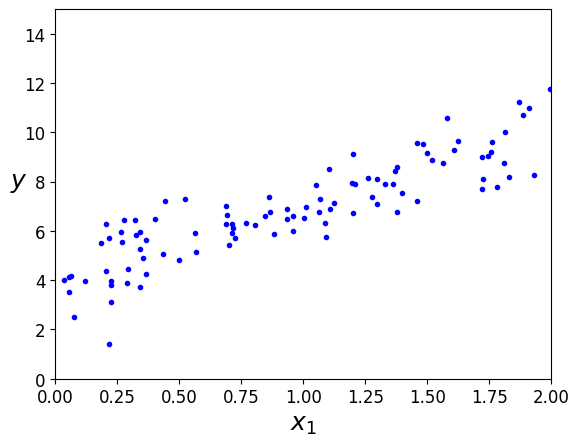

In [5]:
# 绘制数据
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis((0,2,0,15))
plt.show()

In [6]:
# 计算theta
"""
公式:
y = X * theta + epsilon
y = x0 * theta0 + x1 * theta1 + ... + xn * thetan
MSE = 1/m * sum((X * theta - y)^2)


theta = (X^T * X)^-1 * X^T * y

"""
"""偏置项"""
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)#linalg.inv()求逆

In [7]:
theta_best#偏置项和权重

array([[3.96026408],
       [3.0605043 ]])

In [8]:
# 预测
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.96026408],
       [10.08127268]])

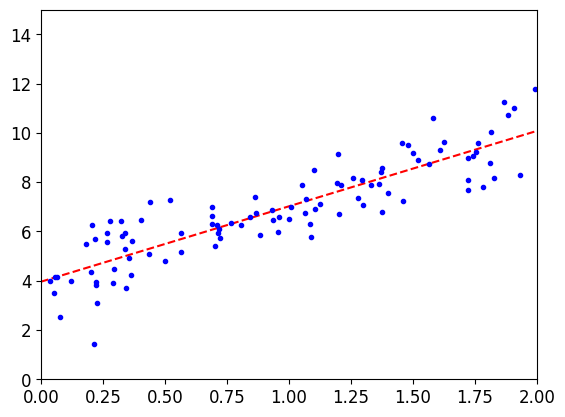

In [9]:
# 绘制预测
plt.plot(X_new, y_predict, 'r--')
plt.plot(X, y, 'b.')
plt.axis((0,2,0,15))
plt.show()

线性回归(使用sklearn)

In [10]:
# 线性回归
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()#实例化
lin_reg.fit(X, y)#训练
lin_reg.intercept_, lin_reg.coef_#截距和权重

(array([3.96026408]), array([[3.0605043]]))

### 梯度下降
核心解决方案, 不只是线性回归, 还可以解决其他问题如: 逻辑回归, 神经网络等

In [11]:
"""
公式：
msg = 1/m * sum((X * theta - y) * X)
矩阵形式：
msg = 2/m * X^T * (X * theta - y)
"""

'\n公式：\nmsg = 1/m * sum((X * theta - y) * X)\n矩阵形式：\nmsg = 2/m * X^T * (X * theta - y)\n'

In [12]:
# 梯度下降
eta = 0.1#学习率
n_iterations = 1000#迭代次数
m = 100#样本数
theta = np.random.randn(2, 1)#随机初始化权重
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[3.96026408],
       [3.0605043 ]])

In [13]:
# 预测
X_new_b.dot(theta)

array([[ 3.96026408],
       [10.08127268]])

In [14]:
# 不同学习率的影响
theta_path_bgd = []
def plot_gradient_descent(theta_, eta_, theta_path=None):
    m_ = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations_ = 1000
    for iteration_ in range(n_iterations_):
        # 绘制预测
        y_predict_ = X_new_b.dot(theta_)
        plt.plot(X_new, y_predict_, 'r-')
        # 计算梯度
        gradients_ = 2/m_ * X_b.T.dot(X_b.dot(theta_) - y)
        theta_ = theta_ - eta_ * gradients_
        # 记录权重
        if theta_path is not None:
            theta_path.append(theta_)
    # 绘制权重
    plt.xlabel('$x_1$', fontsize=18)
    plt.axis((0,2,0,15))
    plt.title(r'$\eta = {}$'.format(eta_), fontsize=16)

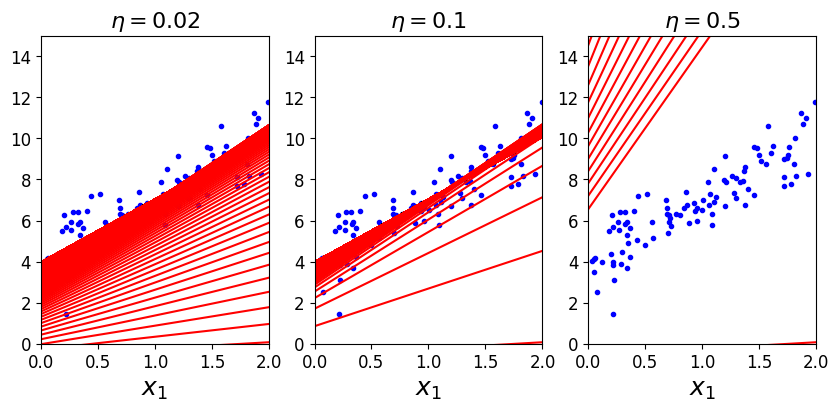

In [15]:
# 三个学习率为0.02, 0.1, 0.5的图
theta = np.random.randn(2, 1)
plt.figure(figsize=(10, 4))
plt.subplot(131); plot_gradient_descent(theta, eta_=0.02)
plt.subplot(132); plot_gradient_descent(theta, eta_=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta_=0.5)
plt.show()

学习率应该尽可能小, 随着迭代次数增加, 学习率应该逐渐减小

### 随机梯度下降

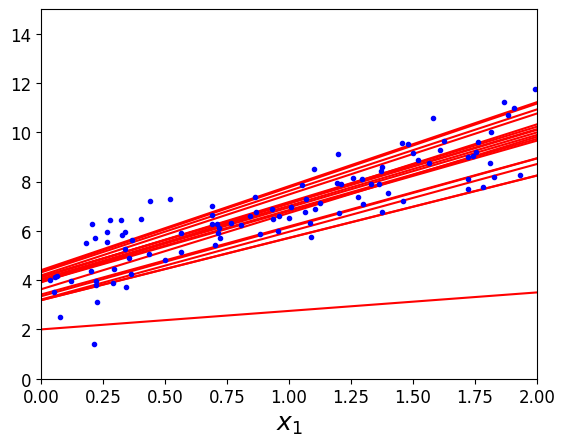

In [16]:
# 随机梯度下降
theta_path_sgd = []
m = len(X_b)
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):#学习率调整
    return t0 / (t + t1)

theta = np.random.randn(2, 1)
for epochs in range(n_epochs):#迭代次数
    for i in range(m):#样本数
        if epochs == 0 and i < 20:#绘制前20个样本的预测
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new, y_predict, 'r-')
        random_index = np.random.randint(m)#随机选择一个样本
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)#计算梯度
        eta = learning_schedule(epochs * m + i)#学习率更新
        theta = theta - eta * gradients#更新权重
        theta_path_sgd.append(theta)
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.axis((0,2,0,15))
plt.show()

### 小批量梯度下降

In [17]:
theta_path_mgd = []
n_epochs = 50
minibatch_size = 16
theta = np.random.randn(2, 1)
t = 0
for epoch in range(n_epochs):#迭代次数
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minibatch_size):#每次迭代取minibatch_size个样本
        t+=1
        xi=X_b_shuffled[i:i+minibatch_size]
        yi=y_shuffled[i:i+minibatch_size]
        gradients=2/minibatch_size*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(t)
        theta=theta-eta*gradients
        theta_path_mgd.append(theta)
theta        

array([[3.89233992],
       [3.12761502]])

### 对比三种实验

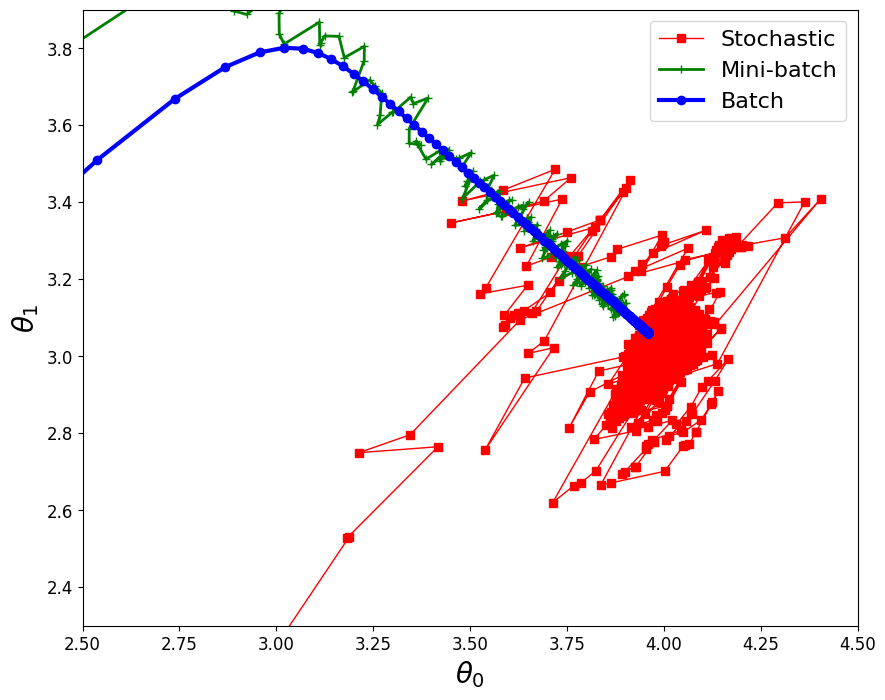

In [18]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)
plt.figure(figsize=(10,8))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'r-s', linewidth=1, label='Stochastic')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], 'g-+', linewidth=2, label='Mini-batch')
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], 'b-o', linewidth=3, label='Batch')
plt.legend(loc='upper right', fontsize=16)
plt.xlabel(r'$\theta_0$', fontsize=20)
plt.ylabel(r'$\theta_1$', fontsize=20)
plt.axis((2.5, 4.5, 2.3, 3.9))
plt.show()

In [19]:
theta_path_sgd

array([[[2.00114794],
        [0.75057351]],

       [[3.18751536],
        [2.53056552]],

       [[3.18344995],
        [2.52939085]],

       ...,

       [[3.97525757],
        [3.06172217]],

       [[3.97433048],
        [3.06073668]],

       [[3.97458635],
        [3.06091861]]])

实际中,mini-batch梯度下降通常是最好的选择, batch数量越大越好, 但是计算量也越大,尽可能在机器允许的情况下选择最大的batch数量

### 多项式回归

In [20]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + np.random.randn(m, 1)


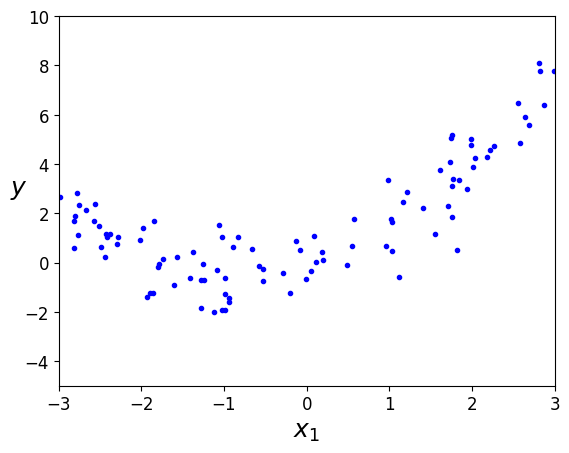

In [21]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis((-3,3,-5,10))
plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures #多项式特征
poly2_features = PolynomialFeatures(degree=2, include_bias=False)# degree=2表示二次多项式
X_poly2 = poly2_features.fit_transform(X)#生成二次多项式特征,fit 并 transform
X[0]

array([1.73167884])

In [23]:
X_poly2[0]

array([1.73167884, 2.9987116 ])

In [24]:
(-1.59261038)**2

2.5364078224837443

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()#实例化
lin_reg.fit(X_poly2, y)#训练
lin_reg.intercept_, lin_reg.coef_#截距和权重

(array([-0.12385387]), array([[0.9089176, 0.5693755]]))

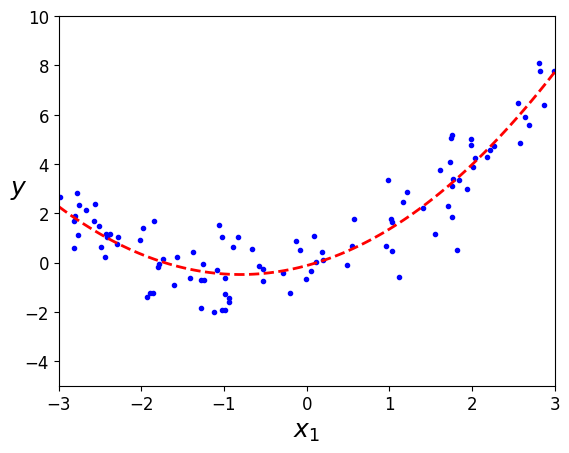

In [26]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly2 = poly2_features.transform(X_new)#生成二次多项式特征 只transform
y_new = lin_reg.predict(X_new_poly2)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r--', linewidth=2)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis((-3,3,-5,10))
plt.show()

### 不同degree的多项式回归

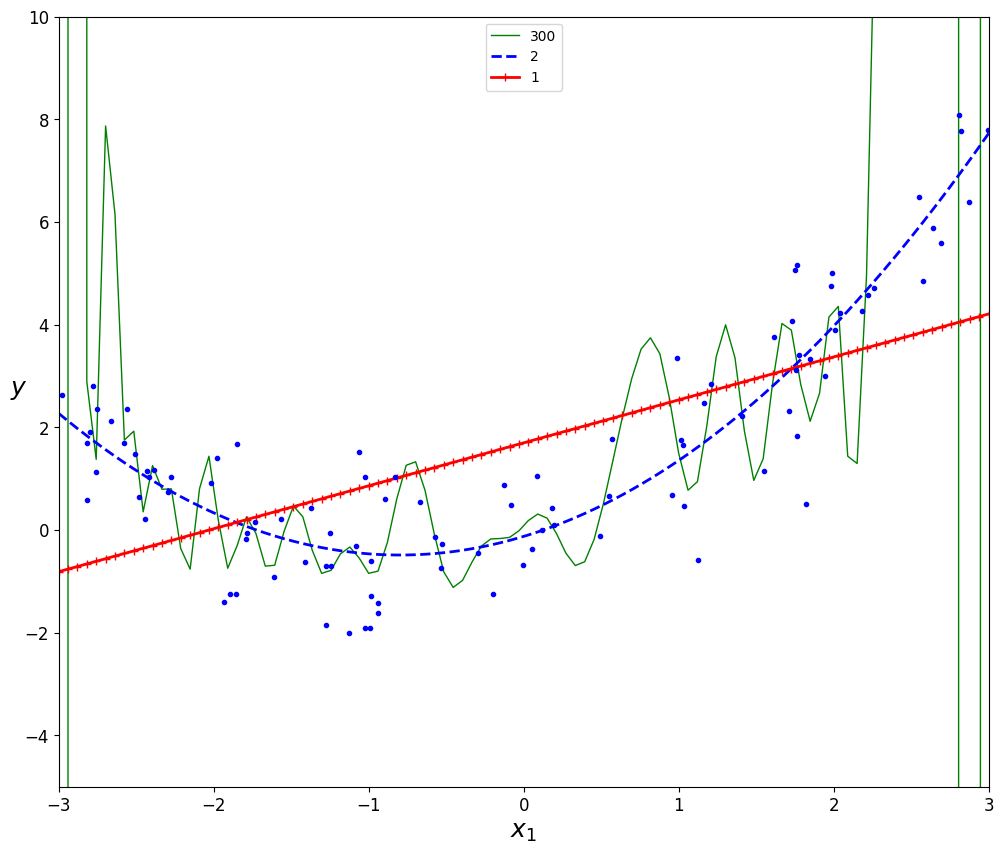

In [27]:
from sklearn.pipeline import Pipeline#流水线
from sklearn.preprocessing import StandardScaler#标准化
plt.figure(figsize=(12,10))#画布大小
for style, width, degree in (('g-', 1, 300), ('b--', 2, 2), ('r-+', 2, 1)):#不同degree的多项式回归
    poly2_features = PolynomialFeatures(degree=degree, include_bias=False)# degree=degree表示degree次多项式
    std_scaler = StandardScaler()#标准化
    lin_reg = LinearRegression()#实例化
    polynomial_regression = Pipeline([('poly2_features', poly2_features),#流水线
                                      ('std_scaler', std_scaler),
                                      ('lin_reg', lin_reg)])
    polynomial_regression.fit(X, y)#训练
    y_new_2 = polynomial_regression.predict(X_new)#预测
    plt.plot(X_new, y_new_2, style, label=str(degree), linewidth=width)
plt.plot(X, y, 'b.')
plt.legend(loc='upper center')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis((-3,3,-5,10))
plt.show()

特征数量过多会导致模型过拟合, 降低degree可以减少过拟合, 模型越复杂,越容易过拟合,不建议使用高次多项式.

### 数据样本数量对模型的影响

In [28]:
from sklearn.metrics import mean_squared_error#均方误差:1/m * sum((X * theta - y)^2)
from sklearn.model_selection import train_test_split#划分训练集和测试集

def plot_learning_curves(model, X, y):#绘制学习曲线:训练集和验证集的均方误差
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)#划分训练集和验证集
    train_errors, val_errors = [], []#训练集和验证集的均方误差
    for m in range(1, len(X_train)):#训练集的样本数
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend(loc='upper right', fontsize=16)
    plt.xlabel('Training set size', fontsize=16)
    plt.ylabel('RMSE', fontsize=16)
    

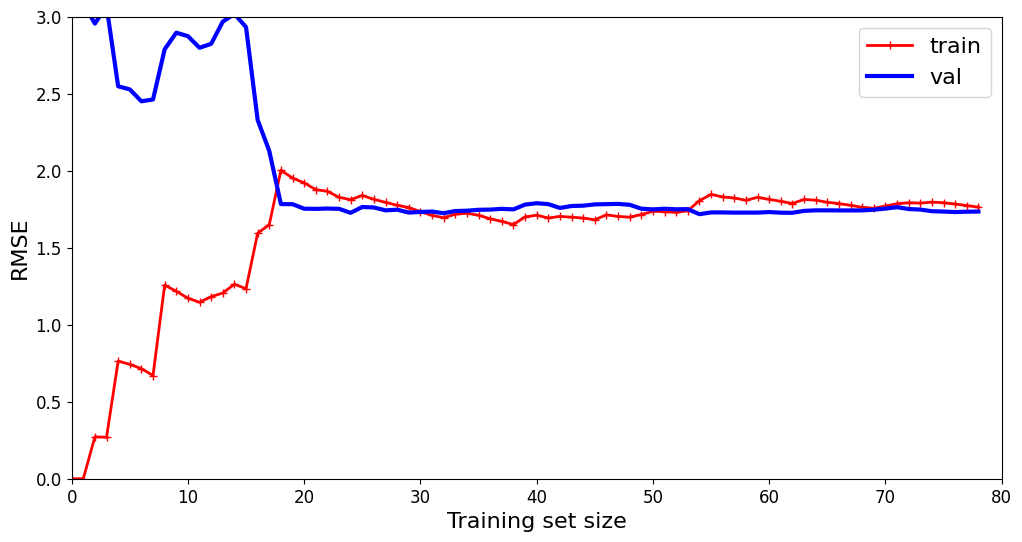

In [29]:
lin_reg = LinearRegression()
plt.figure(figsize=(12, 6))
plot_learning_curves(lin_reg, X, y)
plt.axis((0, 80, 0, 3))
plt.show()


数据量越少, 训练集的效果越好, 验证集的效果越差, 数据量越多, 训练集和验证集的效果越接近, 但是训练集的效果会略差于验证集.

### 多项式回归过拟合风险

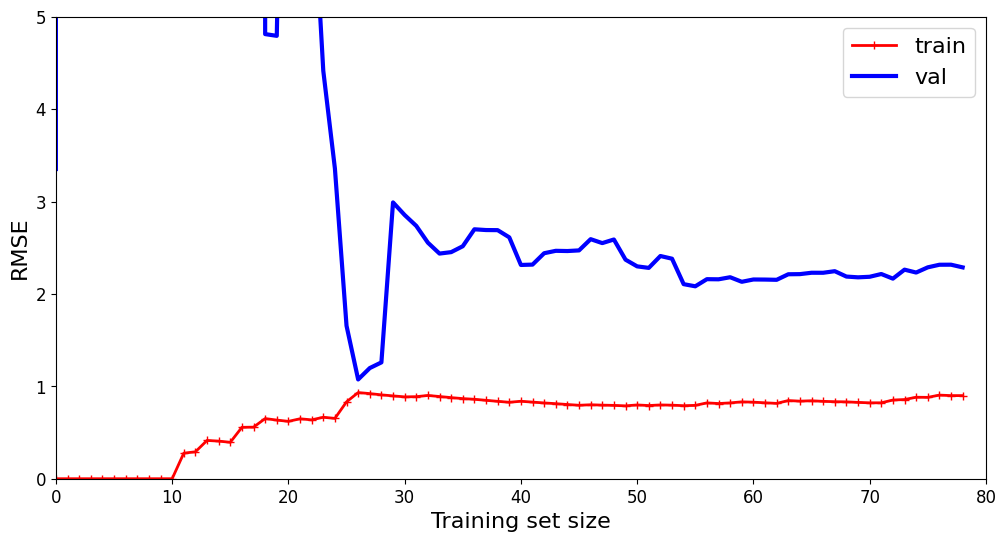

In [30]:
polynomial_regression = Pipeline([('poly2_features', PolynomialFeatures(degree=10, include_bias=False)),
                                    ('lin_reg', LinearRegression())])
plt.figure(figsize=(12, 6))
plot_learning_curves(polynomial_regression, X, y)
plt.axis((0, 80, 0, 5))
plt.show()

越复杂的模型越容易过拟合, 训练集的效果会远远好于验证集, 但是验证集的效果会远远差于训练集.

### 正则化
对权重进行约束 惩罚过大的权重,让权重尽可能平滑, 降低过拟合风险.

### 常见正则化公式：   
- Lasso(绝对值): $J(\theta) = MSE(\theta) + \alpha * \sum(|theta|)$#L1正则化
- Ridge(岭回归): $J(\theta) = MSE(\theta) + \alpha * 1/2 * sum(\theta^2)$#L2正则化
- Elastic Net: $J(\theta) = MSE(\theta) + r * \alpha * \sum(|theta|) + 1-r/2 * \alpha * \sum(\theta^2)$#L1和L2的混合
- r=0时,相当于L2正则化, r=1时,相当于L1正则化     
     
这里使用Ridge公式：
$J(\theta) = MSE(\theta) + \alpha * 1/2 * sum(\theta^2)$      
       
整体J结果越低越好，越稳定越好。       


In [36]:
from sklearn.linear_model import Ridge#岭回归
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)#生成数据
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5#生成数据
X_new = np.linspace(0, 3, 100).reshape(100, 1)#生成预测数据

In [37]:
X_new

array([[0.        ],
       [0.03030303],
       [0.06060606],
       [0.09090909],
       [0.12121212],
       [0.15151515],
       [0.18181818],
       [0.21212121],
       [0.24242424],
       [0.27272727],
       [0.3030303 ],
       [0.33333333],
       [0.36363636],
       [0.39393939],
       [0.42424242],
       [0.45454545],
       [0.48484848],
       [0.51515152],
       [0.54545455],
       [0.57575758],
       [0.60606061],
       [0.63636364],
       [0.66666667],
       [0.6969697 ],
       [0.72727273],
       [0.75757576],
       [0.78787879],
       [0.81818182],
       [0.84848485],
       [0.87878788],
       [0.90909091],
       [0.93939394],
       [0.96969697],
       [1.        ],
       [1.03030303],
       [1.06060606],
       [1.09090909],
       [1.12121212],
       [1.15151515],
       [1.18181818],
       [1.21212121],
       [1.24242424],
       [1.27272727],
       [1.3030303 ],
       [1.33333333],
       [1.36363636],
       [1.39393939],
       [1.424

In [39]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                                ('std_scaler', StandardScaler()),
                                ('regul_reg', model)])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r'$\alpha = {}$'.format(alpha))
    plt.plot(X, y, 'b.')
    plt.legend(loc='upper left', fontsize=16)
    plt.xlabel('$x_1$', fontsize=18)
    plt.axis((0, 3, 0, 4))

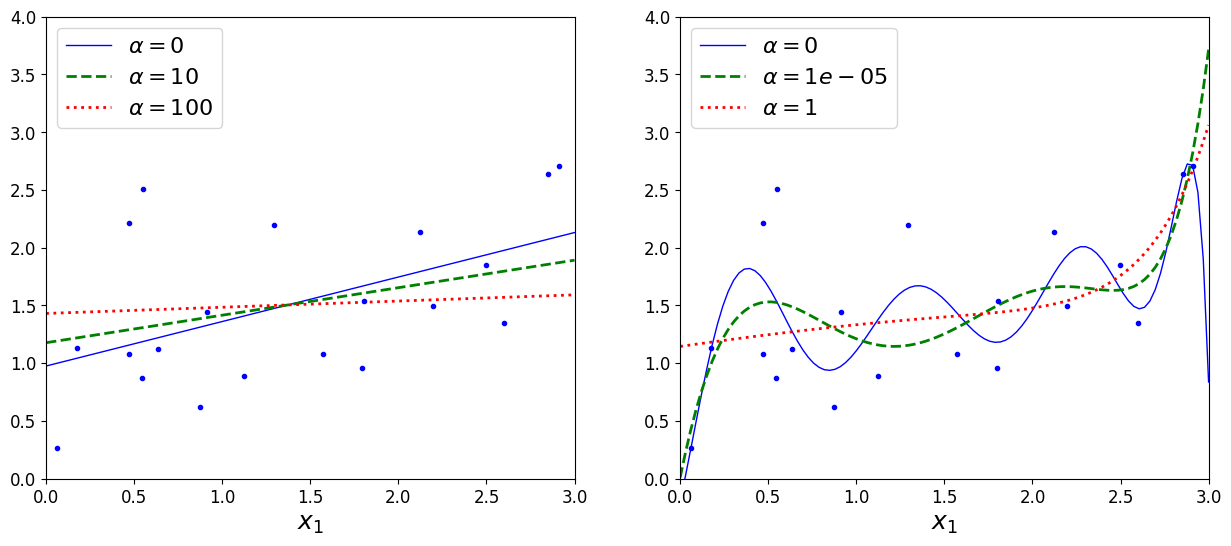

In [41]:
plt.figure(figsize=(15, 6))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100))
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1))
plt.show()

惩罚力度越大(alpha越大), 权重越小, 模型越平滑, 降低过拟合风险.

Lasso

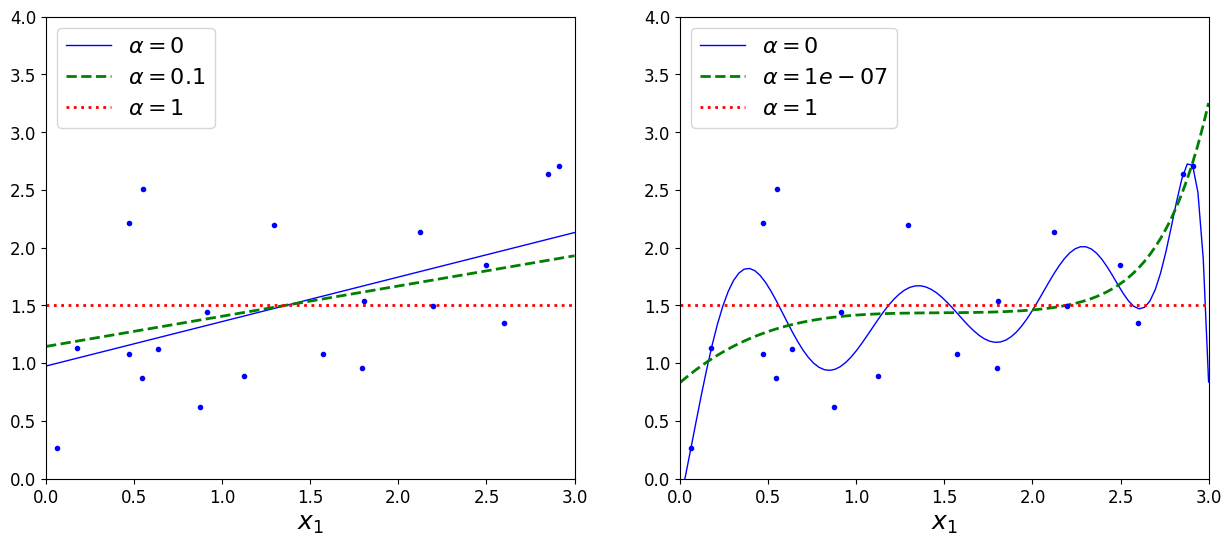

In [42]:
from sklearn.linear_model import Lasso#Lasso
plt.figure(figsize=(15, 6))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1))
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1))

#### 多做对比实验!!!